<a href="https://colab.research.google.com/github/Genullz/Stroke-Prediction/blob/main/02_Core_Project_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the Packages

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')

Load the Dataset

In [61]:
path = ('/content/drive/MyDrive/Data Science Bootcamp/Core Project 02/healthcare-dataset-stroke-data.csv')
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [63]:
# check for duplicates
df.duplicated().sum()

0

In [64]:
# Check for Missing Values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Address inconsistent Values

In [65]:
# Change the age column from an object to an integer
df['age'] = df['age'].astype(float)

In [66]:
# encoding the smoking status column
df['smoking_status'].replace({'Unknown':0, 'smokes':1, 'formerly smoked':2, 'never smoked':3}, inplace=True)

In [67]:
# encoding the residence type column
df['Residence_type'].replace({'Rural': 0, 'Urban': 1}, inplace=True)

In [68]:
# encoding the work type column
df['work_type'].replace({'children': 0, 'Self-employed': 1, 'Private': 2, 'Govt_job': 3, 'Never_worked': 4}, inplace=True)

In [69]:
# encoding the gender column
df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplace=True)

In [70]:
# encoding the ever_married column
df['ever_married'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [71]:
df.dropna(subset=['bmi'], inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.6 KB


##Prepare the dataset

In [73]:
#identify
X = df.drop(columns='stroke', axis=1)
y = df['stroke']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [74]:
#instantiate SimpleImputers with most_frequent and mean strategies
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [75]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include = 'number')

In [76]:
# make pipeline
num_pipe = make_pipeline(mean_imputer, scaler)

In [77]:
# create tuples of (imputer, selector) for each datatype
num_tuple = (num_pipe, num_selector)

In [78]:
preprocessor = make_column_transformer(num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3222eb3280>)])

In [79]:
# fit ColumnTransformer on the training data
preprocessor.fit(X_train, y_train)

# transform both the training and testing data (this will output a NumPy array)
X_train_imputed = preprocessor.transform(X_train)
X_test_imputed = preprocessor.transform(X_test)

In [80]:
X_train_imputed

array([[ 1.11037092, -0.82698222, -0.52064637, ..., -0.03879792,
        -1.06922118,  0.29069877],
       [ 1.34266975,  1.2064991 , -1.81017863, ..., -0.9564555 ,
         0.07450419, -1.29457851],
       [ 1.12139223, -0.82698222,  0.76888589, ...,  0.20472213,
         0.19016181, -0.50193987],
       ...,
       [ 1.28638068, -0.82698222,  0.45761948, ..., -0.32993867,
        -0.86360763,  0.29069877],
       [-1.38413346, -0.82698222, -1.40997896, ..., -0.26539118,
        -1.03066864, -1.29457851],
       [ 1.44559833,  1.2064991 ,  0.90228578, ..., -1.07088059,
        -0.00260089,  0.29069877]])

## Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends

In [81]:
corr = df.corr()

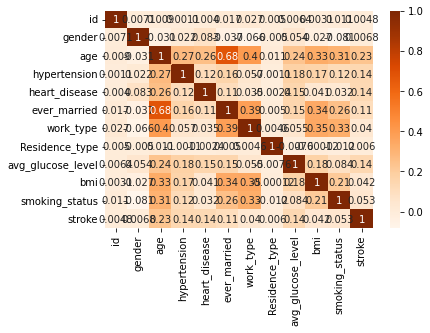

In [82]:
# the heatmap
sns.heatmap(corr, cmap = 'Oranges', annot = True);

The is a moderate correlation between a age and marital status in this dataset with value of 0.68.

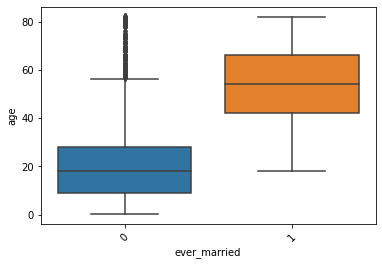

In [83]:
# boxplot
sns.boxplot(data=df, x='ever_married', y='age');
plt.xticks(rotation = 45);

In the Boxplot above, the average mean of age of unmarried patient is under 20 while the average mean age of married patient in our dataset is 55. This box plot shows the age range among potential stroke patients based on marital status.

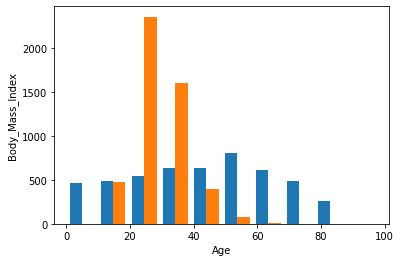

(None,)

<Figure size 432x288 with 0 Axes>

In [84]:
## patient's age
X= df['age']
y= df['bmi']

plt.hist([X,y])
plt.xlabel(
    'Age')
plt.ylabel(
    'Body_Mass_Index')
plt.show()
plt.savefig('MATLABSavedPlot.png', dpi = 300),

In the Histogram above, it shows patient at the of age 24 and under, and those above the age of 75 have a lower Body Mass Index. Teenaegers and young adult are a lot mobile and tend to engage in more outdoor activities than any other age groups which contributes to a lower Body Mass Index. Those in of age range of 75 and up tend to shrink down in size the older they get which also contributes to a lower Body Mass Index. the histogram shows other age groups with a higher Body Mass Index. Obesity and Excess weight does increase the risk of severe illness and other health problems.

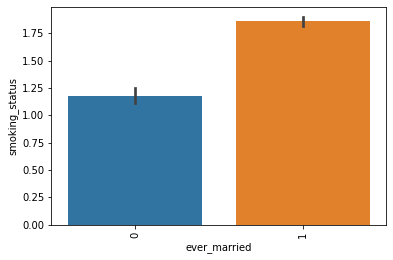

In [85]:
sns.barplot(data=df, x= 'ever_married', y= 'smoking_status')
plt.xticks(rotation = 90);

In this Barplot, we see that marital status corrolates with smoking status. we also see that married patients have a higher smoking rate than unmarried patients. Marriage can cause lots of stress that turns a none-smoker into a smoker.

### Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).

**First Model**

In [86]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))


In [87]:
# Make an instance of the model with default parameters
model = DecisionTreeClassifier()

In [88]:
# Put scaler and model in a pipeline
dectree_pipe = make_pipeline(scaler, model)
dectree_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

In [89]:
pipe_param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [90]:
#fit the model
dectree_grid_search = GridSearchCV(model, pipe_param_grid)

In [91]:
dectree_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [92]:
dectree_grid_search.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}

Adjusting the Ranges of Hyperparameter Values.

In [93]:
pipe_param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

dectree_grid_search2 = GridSearchCV(model, pipe_param_grid2)
dectree_grid_search2.fit(X_train, y_train)
dectree_grid_search2.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [94]:
#retrieve the best version of the model
first_model = dectree_grid_search2.best_estimator_

#refit the model on the whole training set
first_model.fit(X_train, y_train)
#score the model on the test set
first_model.score(X_test, y_test)

0.9470684039087948

In [95]:
# evaluate
eval_classification (dectree_grid_search2, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.70      0.05      0.09       146

    accuracy                           0.96      3681
   macro avg       0.83      0.52      0.54      3681
weighted avg       0.95      0.96      0.94      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



**Evaluating using GridSearch the score is 0.9470684039087948. Evaluating using Classification Report the accuracy score is 0.95**

**2nd Model**

In [96]:
# Make an instance of the model with default parameters
model_2 = KNeighborsClassifier()

In [97]:
# look for tunable hyperparameters
model_2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [98]:
model_2_pipe = make_pipeline(scaler, model_2)
model_2_pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [99]:
%%time
# fitting
model_2_pipe_gs = GridSearchCV(model_2_pipe, model_2_pipe_param_grid)
model_2_pipe_gs.fit(X_train, y_train)

best_model_2_pipe = model_2_pipe_gs.best_estimator_

print('Best model_2 Parameters:')
print(model_2_pipe_gs.best_params_)
print(f'Accuracy of best model_2 is: {best_model_2_pipe.score(X_test, y_test)}')

Best model_2 Parameters:
{'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 3, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best model_2 is: 0.9470684039087948
CPU times: user 2min 11s, sys: 167 ms, total: 2min 11s
Wall time: 2min 11s


In [100]:
# evaluate
eval_classification (model_2_pipe_gs, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.00      0.00      0.00       146

    accuracy                           0.96      3681
   macro avg       0.48      0.50      0.49      3681
weighted avg       0.92      0.96      0.94      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



**For model_2, Evaluating with GridSearch gives us a score of 0.9470684039087948 while Evaluating with Classification Report gives us an accuracy test score of 0.95**

## Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).

In [101]:
# Use PCA to lower the dimensions in this dataset while retaining 95% of the variance
pca = PCA(n_components = .95)

In [102]:
%%time
# Now we will build the pipeline
model_2_pca_pipe = make_pipeline(scaler, pca, model_2)

# fit the pipeline
model_2_pca_pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

CPU times: user 138 µs, sys: 0 ns, total: 138 µs
Wall time: 142 µs


In [103]:
%%time
# fitting
model_2_pca_pipe_gs = GridSearchCV(model_2_pca_pipe, model_2_pca_pipe_param_grid)
model_2_pca_pipe_gs.fit(X_train, y_train)

best_model_2_pca_pipe = model_2_pca_pipe_gs.best_estimator_

print('Best model_2_pca Parameters:')
print(model_2_pca_pipe_gs.best_params_)
print(f'Accuracy of best model_2 is: {best_model_2_pca_pipe.score(X_test, y_test)}')

Best model_2_pca Parameters:
{'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best model_2 is: 0.9470684039087948
CPU times: user 1min 21s, sys: 29 s, total: 1min 50s
Wall time: 1min 18s


In [104]:
# evaluate
eval_classification (model_2_pca_pipe_gs, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.25      0.01      0.01       146

    accuracy                           0.96      3681
   macro avg       0.61      0.50      0.50      3681
weighted avg       0.93      0.96      0.94      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



***Adding PCA definately impacted the speed when fiting the model, without the PCA we had a wall time of 2 mins 15 secs but with the PCA the wall time was 1 min 18 secs which was half the time of fitting a model without the PCA ***

**Even though we got the same accuracy score for the first model and model_2.For Production, I will have to select model_2 because it has concise parameter for tunning and adding PCA really helps in reducing the runtime**.